# Test idea fitness vs inbreeding

The main focus is wether or  not it's possible to sustain variability in the genetic code and cluster male's genome through a specific fitness function.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 

In [3]:
#definition of all the functions needed in the simulation

def generate_individual(n):
    '''
    returns an array of n bits representing a random genome of an individual
    '''
    return np.random.randint(0,2,n)

def fitness (male, female, weight = 1):
    '''
    params:
    male - genetic sequence of male 
    female - genetic sequence of female
    weight - importance of genetic similarity between male and female with respect to male's fitness
    returns the fitness of a male with respect to the female which is choosing
    the partner. This introduces a subjective alpha male definition.

    '''
    return abs(len(male) - 2 * male.sum())  - (male == female).sum()* weight
#    return  -(male == female).sum()* weight

def rndFitness (male,female):
    '''
    this function returns a random fitness value. Is used as a null model'''
    return np.random.randint(40) 


def dist_ham(individuals):
    """
    returns the distribution of hamming distances between the individuals
    """
    dist = []
    for i in range(1,len(individuals)):
        for j in range(0,i):
            dist.append((individuals[i] != individuals[j]).sum())
    return dist

def mate (female, males, father_dist, weight = 1):
    '''
    params:
    female - female genetic seq
    males - list of genetic seq of candidate partners
    weight - weight of genetic similarity in fitness
    father_dist - list where the index of the selected father is appended
    returns th gentic code of the son
    '''
    
    genome_length = len(female)
    np.random.shuffle(males) #this line breaks ties in randomly by shuffling the candidates
    partner = males[np.argmax([fitness(male,female,weight) for male in males])]
    father_dist[partner.sum()] += 1
#     str_partner = str(partner)
#     if str_partner not in father_dict:
#         father_dict[str_partner] = 0
#     father_dict[str_partner] += 1 
    genes_selected = generate_individual(genome_length)
    genomes = (female, partner)
    son = np.array([genomes[genes_selected[i]][i] for i in range(genome_length)])
#     print (f"male:   {partner} \nfemale: {female} \ngeneSel:{genes_selected}\nSon:    {son}")
    return son



def evolve(males, females,weight, subs, time=10):
    '''
    params:
    males - list of genetic seq of male population
    females - list of genetic seq of female population
    weight - weight of genetic similarity in fitness
    subs - fraction of the population substituted with younglings each timestep
    time - number of timesteps

    this function lets the system evolve for time, changing the populations through substitutions with the 
    sons of current male and female population
    
    returns:
    father_dist - matrix of number of sons generated by males with j ones in genome at time i
    zeros_m - number of males with more ones than zeros in the genome as function of time
    zeros_f - number of females with more ones than zeros in the genome as functions of time
    diversity_males - number of different genomes in male population as function of time
    diversity_females - number of different genomes in female population as function of time
    '''
    stats_timestep = 20
    father_dist = np.zeros((time,len(males[0])+1))
    zeros_f = np.zeros(time)
    zeros_m = np.zeros(time)
    diversity_males = []
    diversity_females = []
    for i in range(time):
        sons = [mate(female, males, father_dist[i,:], weight) for female in females]
        subs_int = int(subs * len(males)) # bad choice, will be fixed soon
        into_populations = np.random.choice(range(n_females), subs_int * 2)
        males_dropout = np.random.choice(range(n_males), subs_int)
        females_dropout = np.random.choice(range(n_females), subs_int)
        counter = 0
        for index in males_dropout:
            males[index] = sons[into_populations[counter]]
            counter += 1
        for index in females_dropout:
            females[index] = sons[into_populations[counter]]
            counter += 1
        zeros_m[i] = sum([1 for x in males if x.sum() >= len(x)/2])
        zeros_f[i] = sum([1 for x in females if x.sum() >= len(x)/2])
        if (time % 20 == 0):
            diversity_males.append(count_different_genomes(males))
            diversity_females.append(count_different_genomes(females))
    return father_dist, zeros_m, zeros_f, diversity_males, diversity_females

def count_different_genomes(objs):
    """
    args:
    objs - list of genomes
    
    returns:
    
    number of different genomes inside the given list. 
    
    obj are converted to strings because the  not in operation for np.arrays is more complex and ambiguous written in this way"""
    differents = []
    for obj in objs:
        st = str(obj)
        if st not in differents:
            differents.append(st)
    return len(differents)

seed:1558042770
hamming distributions of females and males


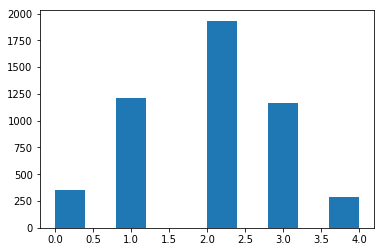

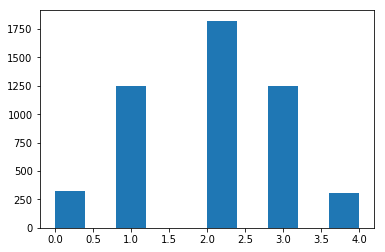

In [33]:
#### initialization of the populations:
seed = int(time.time())
# seed = 1555516290
print(f"seed:{seed}") 
np.random.seed(seed)
n_males = 100
n_females = 100
genome_length = 4
males = [generate_individual(genome_length) for i in range(n_males)]
females = [generate_individual(genome_length) for i in range(n_females)]
init_f = dist_ham(females)
init_m = dist_ham(males)
print("hamming distributions of females and males")
plt.hist(init_f)
plt.show()
plt.hist(init_m)
plt.show()

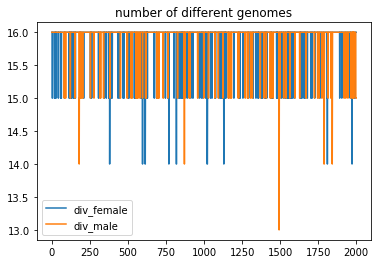

In [34]:
#Evolution of the system. At the end of the evolution a histogram of hamming distances between individuals is plotted for females and males.
sim_length = 2000
fathers, male_p,female_p, div_male, div_female = evolve(males, females,1, .30, sim_length)
# print("trajectory of number of males with more than half genotype with 1 vs number of females with more than half genotype with 1")
# plt.plot(male_p,female_p)
# plt.show()
# print("Hamming distances distribution between males")
# plt.hist(dist_ham(males))
# plt.show()
# print("Hamming distances distribution between females")
# plt.hist(dist_ham(females))
# plt.show()
plt.title("number of different genomes")
plt.plot(div_female, label='div_female')
plt.plot(div_male, label='div_male')
plt.legend()

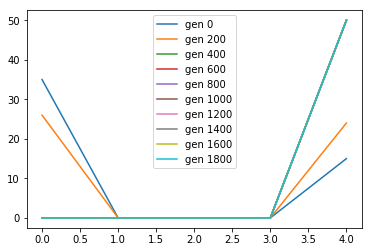

In [20]:
## Distribution of number of ones in the genotype vs number of copulations
step = sim_length / 10
for i in np.arange(0, sim_length, step, dtype=int):
    plt.plot(fathers[i,:],label=f"gen {i}")
plt.legend()
plt.show()
# print(fathers[1999:])

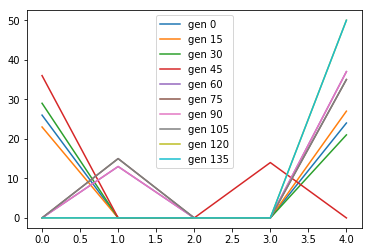

[ 0.  0.  0.  0. 50.]


In [26]:
## Distribution of number of ones in the genotype vs number of copulations
stripped = fathers[200:350,:]
step = len(stripped) / 10
for i in np.arange(0, len(stripped), step, dtype=int):
    plt.plot(stripped[i,:],label=f"gen {i}")
plt.legend()
plt.show()
print(stripped[-10,:])

In [6]:
#Counter of different sequences in female population
differents = []
for female in males:
    st = str(female)
    if st not in differents:
        differents.append(st)
len(differents)
# females[0]
# print (differents)

1

In [9]:
#Visualization of the fitness matrix. rows represents females, columns males.
k=3
base = np.array( [list(np.binary_repr(n,k)) for n in range(2**k)],dtype=int)
print(base)
np.matrix([[fitness(base[i], base[j],1) for i in range(2**k)] for j in range(2**k)])

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


matrix([[ 0, -1, -1,  0, -1,  0,  0,  3],
        [ 1, -2,  0, -1,  0, -1,  1,  2],
        [ 1,  0, -2, -1,  0,  1, -1,  2],
        [ 2, -1, -1, -2,  1,  0,  0,  1],
        [ 1,  0,  0,  1, -2, -1, -1,  2],
        [ 2, -1,  1,  0, -1, -2,  0,  1],
        [ 2,  1, -1,  0, -1,  0, -2,  1],
        [ 3,  0,  0, -1,  0, -1, -1,  0]])